# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [36]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [37]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [38]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [40]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [51]:
~app_train.corr().index.isin(['TARGET'])

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [52]:
### 列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個
df = pd.concat([pd.DataFrame(app_train.corr()[~app_train.corr().index.isin(['TARGET'])]['TARGET']),pd.DataFrame(abs(app_train.corr()[~app_train.corr().index.isin(['TARGET'])]['TARGET']))],axis=1)
df.columns = ['Corr','Corr_Abs']
head_15 = df.sort_values('Corr_Abs').head(n=15)
print(head_15)
tail_15 = df.sort_values('Corr_Abs').tail(n=15)
print(tail_15)

                                Corr  Corr_Abs
FLAG_DOCUMENT_20            0.000215  0.000215
FLAG_DOCUMENT_5            -0.000316  0.000316
FLAG_CONT_MOBILE            0.000370  0.000370
FLAG_MOBIL                  0.000534  0.000534
FLAG_DOCUMENT_12           -0.000756  0.000756
AMT_REQ_CREDIT_BUREAU_WEEK  0.000788  0.000788
AMT_REQ_CREDIT_BUREAU_HOUR  0.000930  0.000930
FLAG_DOCUMENT_19           -0.001358  0.001358
FLAG_DOCUMENT_10           -0.001414  0.001414
FLAG_DOCUMENT_7            -0.001520  0.001520
NONLIVINGAPARTMENTS_MODE   -0.001557  0.001557
FLAG_EMAIL                 -0.001758  0.001758
AMT_REQ_CREDIT_BUREAU_QRT  -0.002022  0.002022
SK_ID_CURR                 -0.002108  0.002108
FLAG_DOCUMENT_4            -0.002672  0.002672
                                 Corr  Corr_Abs
FLOORSMAX_AVG               -0.044003  0.044003
FLAG_DOCUMENT_3              0.044346  0.044346
REG_CITY_NOT_LIVE_CITY       0.044395  0.044395
FLAG_EMP_PHONE               0.045982  0.045982
DAYS_EMP

FLAG_DOCUMENT_20 0.00021539355797303039


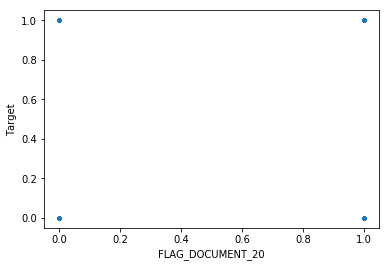

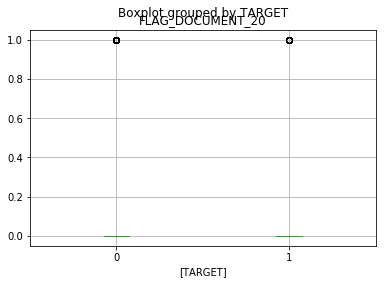

In [24]:
### 相關性最低
min_corr_feature = head_15.index[head_15['Corr_Abs']==head_15['Corr_Abs'].min()]
print(min_corr_feature[0] , head_15['Corr_Abs'].min())
plt.plot(app_train[min_corr_feature], app_train['TARGET'], '.')
plt.xlabel(min_corr_feature[0])
plt.ylabel('Target')
plt.show()
### 從 scatter plot 不夠明顯 ==> 改用 boxplot 看是否真的無相關
app_train.boxplot(column = min_corr_feature[0], by = ['TARGET'])
### 從 box plot確認確實無顯著差異 ==> 無相關

EXT_SOURCE_3 0.17891869762805598


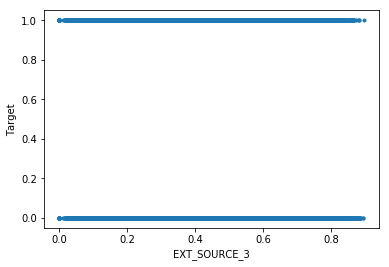

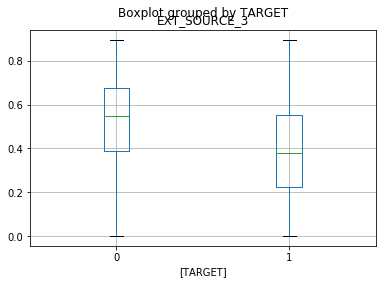

In [53]:
### 相關性最高
max_corr_feature = tail_15.index[tail_15['Corr_Abs']==tail_15['Corr_Abs'].max()]
print(max_corr_feature[0] , tail_15['Corr_Abs'].max())
plt.plot(app_train[max_corr_feature], app_train['TARGET'], '.')
plt.xlabel(max_corr_feature[0])
plt.ylabel('Target')
plt.show()
### 從 scatter plot 不夠明顯 ==> 改用 boxplot 看是否真的無相關
app_train.boxplot(column = max_corr_feature[0], by = ['TARGET'])
### 從 box plot確認確實有顯著差異 ==> 高相關